<a href="https://colab.research.google.com/github/jrequarth/PlayStation/blob/main/JayColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install prophet

In [31]:
from ast import increment_lineno
import pandas as pd
import datetime as dt
from prophet import Prophet

%matplotlib inline

In [32]:
from google.colab import files

In [33]:
uploaded=files.upload()

Saving sea_level_data.csv to sea_level_data (1).csv


In [34]:
df = pd.read_csv("sea_level_data.csv", sep=';', names=['date', 'height', 'ig1', 'ig2'])

# Drop the columns you don't need
df = df[['date', 'height']]
df['height'] = df['height'].astype(int)
print(df)
df.dtypes



             date  height
0       1935.3750    6953
1       1935.4583    6971
2       1935.5417    6956
3       1935.6250    6931
4       1935.7083    7120
...           ...     ...
1047    2022.6250    7235
1048    2022.7083    7362
1049    2022.7917    7385
1050    2022.8750    7292
1051    2022.9583    7249

[1052 rows x 2 columns]


date      object
height     int64
dtype: object

In [35]:
df = df[df['height'] >= 5000]
df = df.reset_index(drop=True)
# print(df.iloc[295:310])
print(df)
df.dtypes


             date  height
0       1935.3750    6953
1       1935.4583    6971
2       1935.5417    6956
3       1935.6250    6931
4       1935.7083    7120
...           ...     ...
1032    2022.6250    7235
1033    2022.7083    7362
1034    2022.7917    7385
1035    2022.8750    7292
1036    2022.9583    7249

[1037 rows x 2 columns]


date      object
height     int64
dtype: object

In [36]:
df.iloc[1015,0]


'\xa0 2021.2083'

In [37]:
df.iloc[1,0]

'\xa0 1935.4583'

In [38]:
# Remove "\xa0" from 'date' column
df['date'] = df['date'].str.replace('\xa0 ', '')

# Convert 'date' column to datetime format
# df['date'] = pd.to_datetime(df['date'], format='%Y.%f')

# Now you have a 'date' column with datetime values including the decimal part
print(df)
print("-----------------------------------------------------")
df.dtypes


           date  height
0     1935.3750    6953
1     1935.4583    6971
2     1935.5417    6956
3     1935.6250    6931
4     1935.7083    7120
...         ...     ...
1032  2022.6250    7235
1033  2022.7083    7362
1034  2022.7917    7385
1035  2022.8750    7292
1036  2022.9583    7249

[1037 rows x 2 columns]
-----------------------------------------------------


date      object
height     int64
dtype: object

In [39]:
df.iloc[1010,0]


'2020.7917'

In [40]:
# Change df['date'] column to float so that we can separate year from month
df['date'] = df['date'].str.strip()  # Remove leading and trailing whitespaces
df['date'] = df['date'].astype(float)  # Convert 'date' column to float

# Extract 'year' and 'month' columns
df['year'] = df['date'].astype(int)
df['month'] = (df['date'] - df['year']) * 12

# Now you have 'year' and 'month' columns, but the month variables will
# be corrected in the next cell
print(df[['date', 'year', 'month' , 'height']])


           date  year    month  height
0     1935.3750  1935   4.5000    6953
1     1935.4583  1935   5.4996    6971
2     1935.5417  1935   6.5004    6956
3     1935.6250  1935   7.5000    6931
4     1935.7083  1935   8.4996    7120
...         ...   ...      ...     ...
1032  2022.6250  2022   7.5000    7235
1033  2022.7083  2022   8.4996    7362
1034  2022.7917  2022   9.5004    7385
1035  2022.8750  2022  10.5000    7292
1036  2022.9583  2022  11.4996    7249

[1037 rows x 4 columns]


In [41]:
# The month variables need to be moved from mid-month to full month.
df['month'] = df['month'] + 0.5

# Now you have 'year' and 'month' columns
# Month is a float variable still
print(df[['date', 'year', 'month' , 'height']])


           date  year    month  height
0     1935.3750  1935   5.0000    6953
1     1935.4583  1935   5.9996    6971
2     1935.5417  1935   7.0004    6956
3     1935.6250  1935   8.0000    6931
4     1935.7083  1935   8.9996    7120
...         ...   ...      ...     ...
1032  2022.6250  2022   8.0000    7235
1033  2022.7083  2022   8.9996    7362
1034  2022.7917  2022  10.0004    7385
1035  2022.8750  2022  11.0000    7292
1036  2022.9583  2022  11.9996    7249

[1037 rows x 4 columns]


In [42]:
# Change month to an integer
df['int_month'] = round(df['month']).astype(int)
print(df[['date', 'year', 'int_month' , 'height']])



           date  year  int_month  height
0     1935.3750  1935          5    6953
1     1935.4583  1935          6    6971
2     1935.5417  1935          7    6956
3     1935.6250  1935          8    6931
4     1935.7083  1935          9    7120
...         ...   ...        ...     ...
1032  2022.6250  2022          8    7235
1033  2022.7083  2022          9    7362
1034  2022.7917  2022         10    7385
1035  2022.8750  2022         11    7292
1036  2022.9583  2022         12    7249

[1037 rows x 4 columns]


In [43]:
# Combine the year and month columns into a datetime column
df['year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['int_month'].astype(str), format='%Y-%m')

# Print the result
print(df[['date', 'year', 'int_month', 'height', 'year_month']])


           date  year  int_month  height year_month
0     1935.3750  1935          5    6953 1935-05-01
1     1935.4583  1935          6    6971 1935-06-01
2     1935.5417  1935          7    6956 1935-07-01
3     1935.6250  1935          8    6931 1935-08-01
4     1935.7083  1935          9    7120 1935-09-01
...         ...   ...        ...     ...        ...
1032  2022.6250  2022          8    7235 2022-08-01
1033  2022.7083  2022          9    7362 2022-09-01
1034  2022.7917  2022         10    7385 2022-10-01
1035  2022.8750  2022         11    7292 2022-11-01
1036  2022.9583  2022         12    7249 2022-12-01

[1037 rows x 5 columns]


In [44]:
df.dtypes

date                 float64
height                 int64
year                   int64
month                float64
int_month              int64
year_month    datetime64[ns]
dtype: object

In [45]:
new_df = df[['year_month', 'height']].copy()

# Print the result
print(new_df)

     year_month  height
0    1935-05-01    6953
1    1935-06-01    6971
2    1935-07-01    6956
3    1935-08-01    6931
4    1935-09-01    7120
...         ...     ...
1032 2022-08-01    7235
1033 2022-09-01    7362
1034 2022-10-01    7385
1035 2022-11-01    7292
1036 2022-12-01    7249

[1037 rows x 2 columns]


In [72]:
new_df.to_csv('/content/drive/MyDrive/my_cleaned_sea_level_data.csv', index=False)

In [69]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [46]:
new_df.columns = ['ds' , 'y']
display(new_df)


,ds,y
0,1935-05-01,6953
1,1935-06-01,6971
2,1935-07-01,6956
3,1935-08-01,6931
4,1935-09-01,7120
...,...,...
1032,2022-08-01,7235
1033,2022-09-01,7362
1034,2022-10-01,7385
1035,2022-11-01,7292


In [47]:
from re import M
m = Prophet()


In [48]:
m.fit(new_df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptxq1o5s_/cv1v6ezs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptxq1o5s_/4tbpbr44.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14115', 'data', 'file=/tmp/tmptxq1o5s_/cv1v6ezs.json', 'init=/tmp/tmptxq1o5s_/4tbpbr44.json', 'output', 'file=/tmp/tmptxq1o5s_/prophet_model14rxaobt/prophet_model-20240206001416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:14:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:14:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [49]:
future = m.make_future_dataframe(periods=120, freq='M')
display(future.tail(10))


,ds
1147,2032-02-29
1148,2032-03-31
1149,2032-04-30
1150,2032-05-31
1151,2032-06-30
1152,2032-07-31
1153,2032-08-31
1154,2032-09-30
1155,2032-10-31
1156,2032-11-30


In [50]:
forecast = m.predict(future)
display(forecast.tail())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1152,2032-07-31,7426.138096,7330.647094,7551.627932,7365.691185,7484.992650,14.648584,14.648584,14.648584,14.648584,14.648584,14.648584,0.0,0.0,0.0,7440.786680
1153,2032-08-31,7427.090838,7418.305757,7635.696353,7365.492463,7486.813082,99.959933,99.959933,99.959933,99.959933,99.959933,99.959933,0.0,0.0,0.0,7527.050771
1154,2032-09-30,7428.012847,7400.548858,7607.241824,7365.248086,7488.463138,70.010641,70.010641,70.010641,70.010641,70.010641,70.010641,0.0,0.0,0.0,7498.023487
1155,2032-10-31,7428.965589,7328.667706,7546.455750,7365.364819,7489.994942,10.873171,10.873171,10.873171,10.873171,10.873171,10.873171,0.0,0.0,0.0,7439.838759
1156,2032-11-30,7429.887597,7240.442093,7467.915540,7365.599103,7491.681518,-71.604922,-71.604922,-71.604922,-71.604922,-71.604922,-71.604922,0.0,0.0,0.0,7358.282675


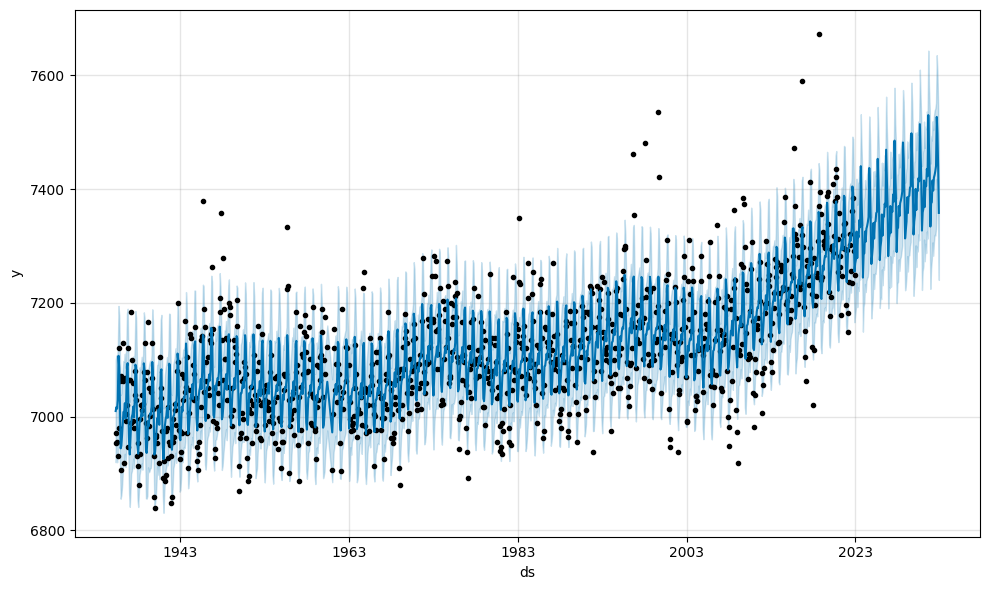

In [51]:
m.plot(forecast);


In [52]:
forecast[['ds' , 'yhat' , 'yhat_lower' , 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1152,2032-07-31,7440.786680,7330.647094,7551.627932
1153,2032-08-31,7527.050771,7418.305757,7635.696353
1154,2032-09-30,7498.023487,7400.548858,7607.241824
1155,2032-10-31,7439.838759,7328.667706,7546.455750
1156,2032-11-30,7358.282675,7240.442093,7467.915540


In [53]:
forecast = forecast.set_index('ds')
forecast.tail(10)


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2032-02-29,7421.435852,7306.489662,7519.310183,7364.953155,7477.567365,-6.063852,-6.063852,-6.063852,-6.063852,-6.063852,-6.063852,0.0,0.0,0.0,7415.372000
2032-03-31,7422.388594,7283.016305,7503.995242,7364.843411,7479.503871,-24.807458,-24.807458,-24.807458,-24.807458,-24.807458,-24.807458,0.0,0.0,0.0,7397.581137
2032-04-30,7423.310603,7306.183674,7527.757239,7365.025155,7481.065818,-3.077432,-3.077432,-3.077432,-3.077432,-3.077432,-3.077432,0.0,0.0,0.0,7420.233171
2032-05-31,7424.263345,7319.615308,7538.177847,7365.290668,7482.605464,0.867233,0.867233,0.867233,0.867233,0.867233,0.867233,0.0,0.0,0.0,7425.130579
2032-06-30,7425.185354,7318.427479,7541.804210,7365.492189,7483.832520,6.464271,6.464271,6.464271,6.464271,6.464271,6.464271,0.0,0.0,0.0,7431.649624
2032-07-31,7426.138096,7330.647094,7551.627932,7365.691185,7484.992650,14.648584,14.648584,14.648584,14.648584,14.648584,14.648584,0.0,0.0,0.0,7440.786680
2032-08-31,7427.090838,7418.305757,7635.696353,7365.492463,7486.813082,99.959933,99.959933,99.959933,99.959933,99.959933,99.959933,0.0,0.0,0.0,7527.050771
2032-09-30,7428.012847,7400.548858,7607.241824,7365.248086,7488.463138,70.010641,70.010641,70.010641,70.010641,70.010641,70.010641,0.0,0.0,0.0,7498.023487
2032-10-31,7428.965589,7328.667706,7546.455750,7365.364819,7489.994942,10.873171,10.873171,10.873171,10.873171,10.873171,10.873171,0.0,0.0,0.0,7439.838759


<Axes: xlabel='ds'>

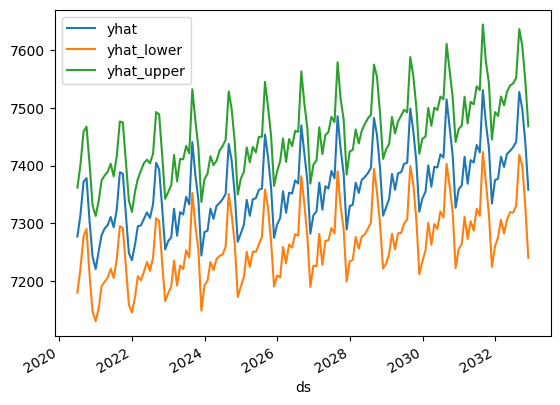

In [54]:
forecast[['yhat' , 'yhat_lower' , 'yhat_upper']].iloc[-150:,:].plot()

In [ ]:
# uploaded=files.upload()


In [56]:
temps = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    parse_dates=True,
    infer_datetime_format=True
).dropna()

# Review the first and last five rows of the DataFrame
display(temps.head())
display(temps.tail())

,,,,,,,,,,,,,,,,,,Land-Ocean: Northern Hemispheric Means
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
1880,-.36,-.51,-.24,-.30,-.06,-.16,-.18,-.25,-.22,-.31,-.41,-.40,-.28,***,***,-.20,-.20,-.31
1881,-.31,-.22,-.04,.00,.04,-.34,.08,-.05,-.28,-.45,-.37,-.23,-.18,-.20,-.31,.00,-.10,-.36
1882,.26,.21,.02,-.32,-.24,-.30,-.28,-.14,-.23,-.52,-.32,-.67,-.21,-.17,.08,-.18,-.24,-.36
1883,-.57,-.66,-.15,-.29,-.24,-.13,-.04,-.22,-.32,-.16,-.42,-.15,-.28,-.32,-.63,-.23,-.13,-.30


,,,,,,,,,,,,,,,,,,Land-Ocean: Northern Hemispheric Means
2019,1.19,1.11,1.54,1.24,.98,1.18,1.03,1.09,1.21,1.30,1.19,1.39,1.20,1.18,1.13,1.25,1.10,1.23
2020,1.58,1.70,1.65,1.40,1.27,1.12,1.10,1.12,1.20,1.21,1.60,1.20,1.35,1.36,1.56,1.44,1.11,1.34
2021,1.25,.96,1.20,1.12,1.03,1.20,1.07,1.02,1.05,1.31,1.31,1.15,1.14,1.14,1.14,1.12,1.10,1.22
2022,1.24,1.17,1.42,1.08,1.01,1.12,1.05,1.17,1.15,1.31,1.09,1.07,1.16,1.16,1.18,1.17,1.11,1.18
2023,1.29,1.32,1.59,1.02,1.11,1.18,1.43,1.57,1.66,1.88,1.99,1.87,1.49,1.43,1.23,1.24,1.39,1.84


In [58]:
temps.columns

Index(['Land-Ocean: Northern Hemispheric Means'], dtype='object')

In [59]:
temps.index

MultiIndex([('Year',   'Jan',  'Feb',  'Mar',  'Apr',  'May',  'Jun', ...),
            ('1880',  '-.36', '-.51', '-.24', '-.30', '-.06', '-.16', ...),
            ('1881',  '-.31', '-.22', '-.04',  '.00',  '.04', '-.34', ...),
            ('1882',   '.26',  '.21',  '.02', '-.32', '-.24', '-.30', ...),
            ('1883',  '-.57', '-.66', '-.15', '-.29', '-.24', '-.13', ...),
            ('1884',  '-.16', '-.09', '-.63', '-.60', '-.36', '-.43', ...),
            ('1885', '-1.00', '-.46', '-.24', '-.49', '-.58', '-.45', ...),
            ('1886',  '-.75', '-.84', '-.71', '-.37', '-.33', '-.37', ...),
            ('1887', '-1.08', '-.70', '-.44', '-.39', '-.26', '-.21', ...),
            ('1888',  '-.48', '-.61', '-.64', '-.22', '-.15', '-.03', ...),
            ...
            ('2014',   '.97',  '.71', '1.19', '1.08',  '.89',  '.81', ...),
            ('2015',  '1.18', '1.19', '1.32', '1.02', '1.04', '1.05', ...),
            ('2016',  '1.54', '1.93', '1.90', '1.47', '1.11', '1.11', ..

In [60]:
temps.reset_index(inplace=True)

In [61]:
temps.columns

Index(['level_0', 'level_1', 'level_2', 'level_3', 'level_4', 'level_5',
       'level_6', 'level_7', 'level_8', 'level_9', 'level_10', 'level_11',
       'level_12', 'level_13', 'level_14', 'level_15', 'level_16', 'level_17',
       'Land-Ocean: Northern Hemispheric Means'],
      dtype='object')

In [62]:
temps.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,level_13,level_14,level_15,level_16,level_17,Land-Ocean: Northern Hemispheric Means
0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
1,1880,-.36,-.51,-.24,-.30,-.06,-.16,-.18,-.25,-.22,-.31,-.41,-.40,-.28,***,***,-.20,-.20,-.31
2,1881,-.31,-.22,-.04,.00,.04,-.34,.08,-.05,-.28,-.45,-.37,-.23,-.18,-.20,-.31,.00,-.10,-.36
3,1882,.26,.21,.02,-.32,-.24,-.30,-.28,-.14,-.23,-.52,-.32,-.67,-.21,-.17,.08,-.18,-.24,-.36
4,1883,-.57,-.66,-.15,-.29,-.24,-.13,-.04,-.22,-.32,-.16,-.42,-.15,-.28,-.32,-.63,-.23,-.13,-.30


In [67]:
temps.drop(columns=['level_13', 'level_14', 'level_15', 'level_16', 'level_17','Land-Ocean: Northern Hemispheric Means'], inplace=True)
temps.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12
0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,1880,-.36,-.51,-.24,-.30,-.06,-.16,-.18,-.25,-.22,-.31,-.41,-.40
2,1881,-.31,-.22,-.04,.00,.04,-.34,.08,-.05,-.28,-.45,-.37,-.23
3,1882,.26,.21,.02,-.32,-.24,-.30,-.28,-.14,-.23,-.52,-.32,-.67
4,1883,-.57,-.66,-.15,-.29,-.24,-.13,-.04,-.22,-.32,-.16,-.42,-.15


In [68]:
temps.columns

Index(['level_0', 'level_1', 'level_2', 'level_3', 'level_4', 'level_5',
       'level_6', 'level_7', 'level_8', 'level_9', 'level_10', 'level_11',
       'level_12'],
      dtype='object')